In [4]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [7]:
data_path = '../../input/Lago_Sintetico_Testes/'
geo_model = gp.create_model('SyntheitcBasinTeste5')

In [8]:
gp.init_data(geo_model,
             extent=[0, 2000, 0, 2000, 0, 2000],
             resolution=[50, 50, 50],
             path_i=data_path + "1_base/surface_points.csv",
             path_o=data_path + "1_base/orientations_points.csv")

Active grids: ['regular']


SyntheitcBasinTeste5  2023-05-11 16:17

In [9]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Shale,Default series,1,#015482,1
1,Sandstone_1,Default series,2,#9f0052,2
2,Siltstone,Default series,3,#ffbe00,3
3,Sandstone_2,Default series,4,#728f02,4
4,Main_Fault,Default series,5,#443988,5
5,basement,Basement,1,#ff3f20,6


In [10]:
gp.map_stack_to_surfaces(geo_model,
                         {"Fault_Series": 'Main_Fault',
                             "Strat_Series": ('Sandstone_2', 'Siltstone',
                                              'Shale', 'Sandstone_1')})

,surface,series,order_surfaces,color,id
4,Main_Fault,Fault_Series,1,#443988,1
0,Shale,Strat_Series,1,#015482,2
1,Sandstone_1,Strat_Series,2,#9f0052,3
2,Siltstone,Strat_Series,3,#ffbe00,4
3,Sandstone_2,Strat_Series,4,#728f02,5
5,basement,Basement,1,#ff3f20,6


In [11]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Erosion,True,False,False
Strat_Series,2,Erosion,True,False,False
Basement,3,Erosion,False,False,False


In [12]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Strat_Series,2,Erosion,True,False,False
Basement,3,Erosion,False,False,False


In [13]:
geo_model.additional_data

values
Structure isLith                                         True
          isFault                                        True
          number faults                                     1
          number surfaces                                   5
          number series                                     3
          number surfaces per series                [1, 4, 0]
          len surfaces surface_points      [5, 16, 15, 13, 8]
          len series surface_points                [5, 52, 0]
          len series orientations                   [1, 2, 0]
Options   dtype                                       float64
          output                                      geology
          theano_optimizer                       fast_compile
          device                                          cpu
          verbosity                                      None
Kriging   range                                   3464.101615
          $C_o$                                 285714.285714
          drift equations                           [3, 3, 3]
Rescaling rescaling factor                               3800
          centers                      [850.0, 1000.0, 900.0]

In [14]:
geo_model.grid

Grid Object. Values: 
array([[  20.,   20.,   20.],
       [  20.,   20.,   60.],
       [  20.,   20.,  100.],
       ...,
       [1980., 1980., 1900.],
       [1980., 1980., 1940.],
       [1980., 1980., 1980.]])

c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


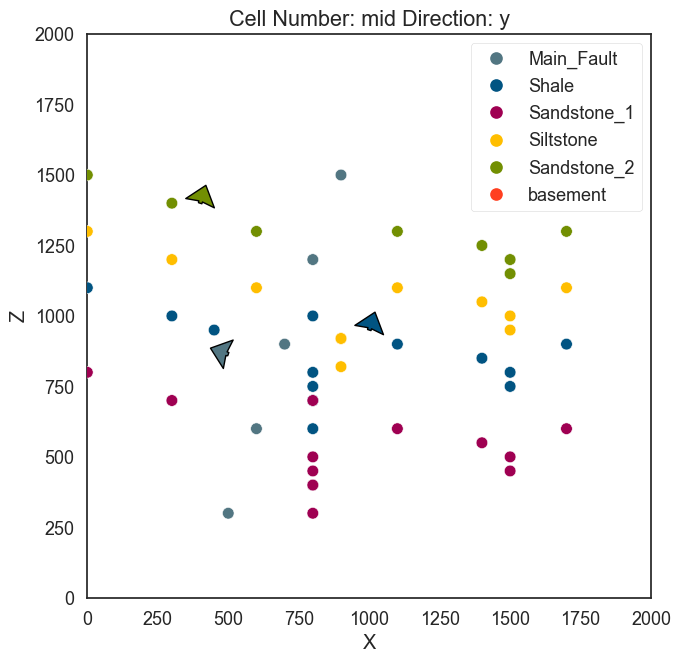

In [15]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [16]:
gp.get_data(geo_model, 'orientations')

,X,Y,Z,G_x,G_y,G_z,smooth,surface
2,500,1000,864,-0.945519,9.998263e-13,0.325568,0.01,Main_Fault
0,1000,1000,950,0.309017,1.000019e-12,0.951057,0.01,Shale
1,400,1000,1400,0.309017,1.000019e-12,0.951057,0.01,Sandstone_2


[1600. 2000.]
Active grids: ['regular' 'topography']


c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


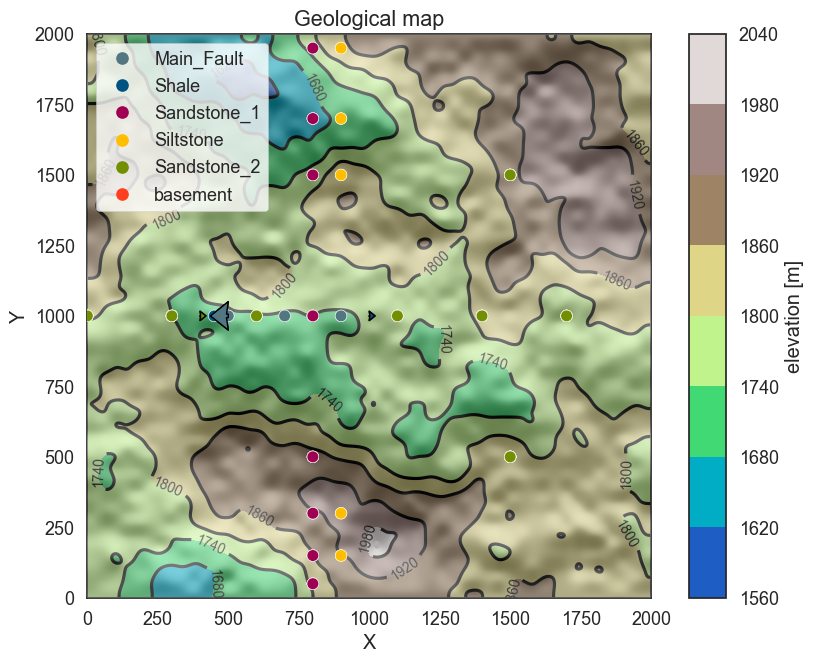

In [17]:
geo_model.set_topography(source='random')
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'])
plt.show()

In [18]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [19]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                         values
range              3464.101615
$C_o$            285714.285714
drift equations      [3, 3, 3]


In [20]:
sol = gp.compute_model(geo_model)

c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\core\solution.py:181: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  [values[0][:, l0: l1], values[4][:, l0: l1].astype(float)])


In [21]:
sol


Lithology ids 
  [6. 6. 6. ... 2. 2. 2.] 

c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


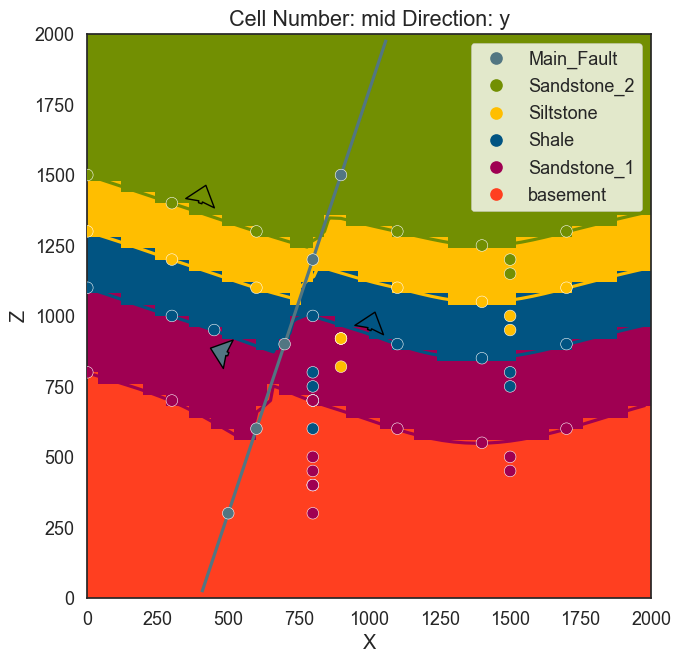

In [22]:
gp.plot_2d(geo_model, show_data=True)
plt.show()

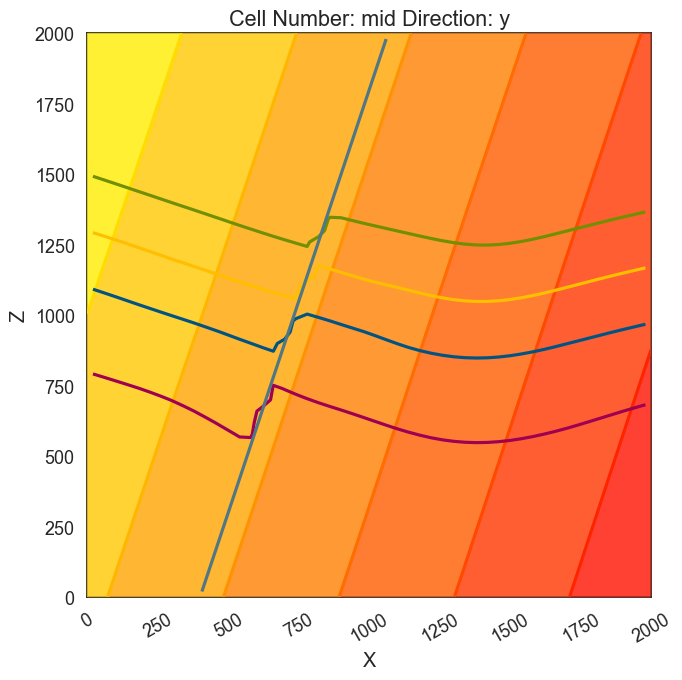

In [23]:
gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
plt.show()

In [24]:
geo_model.solutions.scalar_field_at_surface_points

array([[-0.55696412,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.64919199,  0.55157752,  0.73008223,  0.81760265]])

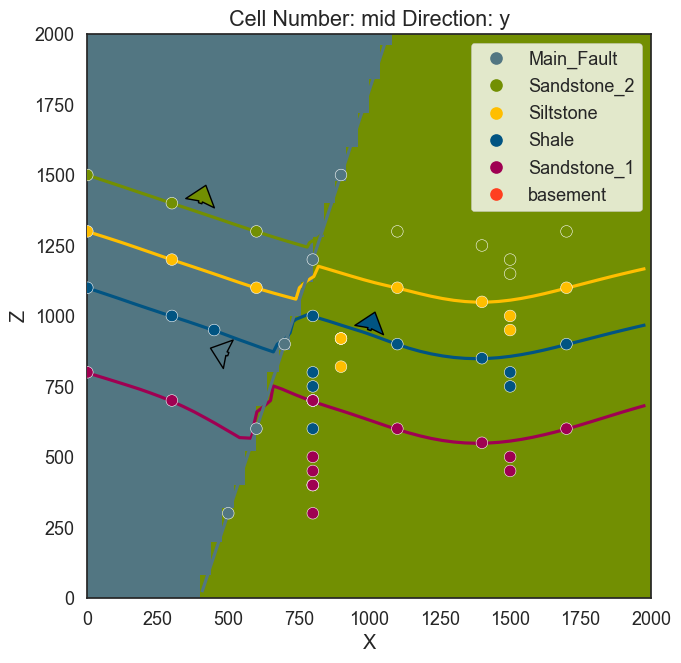

In [25]:
gp.plot_2d(geo_model, show_block=True, show_lith=False)
plt.show()

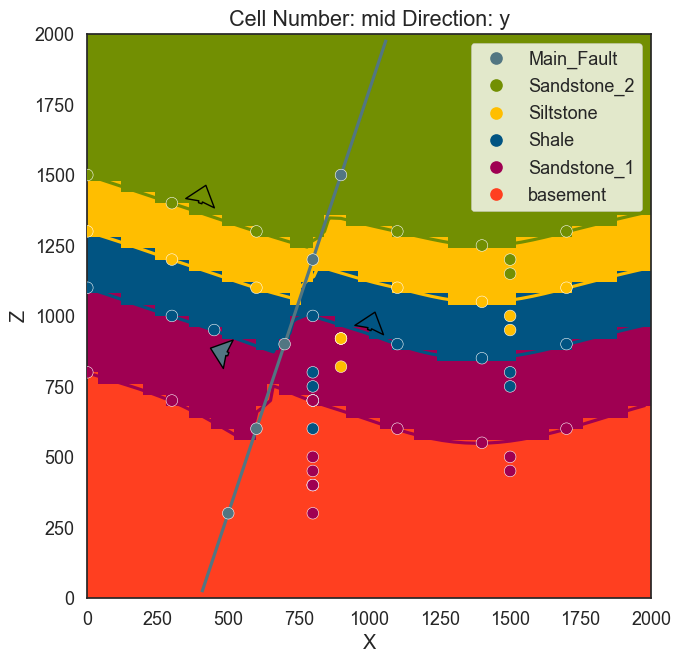

In [26]:
gp.plot_2d(geo_model, series_n=1, show_block=True, show_lith=False)
plt.show()

In [27]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\plotting\tools.py:624: PyVistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  PyVistaDeprecationWarning,
c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


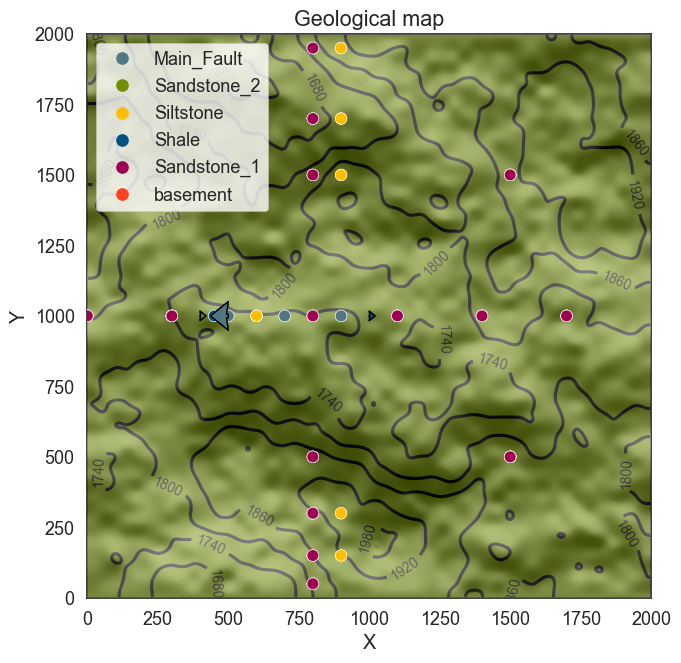

In [28]:
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_boundaries=False, show_data=True)
plt.show()

In [29]:
g3d = gp.plot_3d(geo_model,
                 show_topography=True,
                 show_lith=False,
                 show_surfaces=False,
                 show_results=False)

In [26]:
#gp.save_model(geo_model)

True